In [247]:
import pandas as pd 

import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [250]:
df = pd.read_csv("greenhouse.csv")
df.head()

,country_or_area,year,value,category
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...


In [251]:
df.rename({"country_or_area": "country"}, axis=1, inplace=True)

# Decision tree model

In [252]:
countries = {
    'Australia': 'Australia',
    'Austria': 'Europe',
    'Belarus': 'Europe',
    'Belgium': 'Europe',
    'Bulgaria': 'Europe',
    'Canada': 'North America',
    'Croatia': 'Europe',
    'Cyprus': 'Europe',
    'Czech Republic': 'Europe',
    'Denmark': 'Europe',
    'Estonia': 'Europe',
    'European Union': 'Europe',
    'Finland': 'Europe',
    'France': 'Europe',
    'Germany': 'Europe',
    'Greece': 'Europe',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'Ireland': 'Europe',
    'Italy': 'Europe',
    'Japan': 'Asia',
    'Latvia': 'Europe',
    'Liechtenstein': 'Europe',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Malta': 'Europe',
    'Monaco': 'Europe',
    'Netherlands': 'Europe',
    'New Zealand': 'Oceania',
    'Norway': 'Europe',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Romania': 'Europe',
    'Russian Federation': 'Europe',
    'Slovakia': 'Europe',
    'Slovenia': 'Europe',
    'Spain': 'Europe',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Turkey': 'Asia',
    'Ukraine': 'Europe',
    'United Kingdom': 'Europe',
    'United States of America': 'North America'
}

directions = {
    'Australia': 'South',
    'Austria': 'West',
    'Belarus': 'North East',
    'Belgium': 'North West',
    'Bulgaria': 'North',
    'Canada': 'North West',
    'Croatia': 'North',
    'Cyprus': 'South East',
    'Czech Republic': 'North',
    'Denmark': 'North',
    'Estonia': 'North East',
    'European Union': 'North West',
    'Finland': 'North East',
    'France': 'North West',
    'Germany': 'North West',
    'Greece': 'South East',
    'Hungary': 'North',
    'Iceland': 'North',
    'Ireland': 'North West',
    'Italy': 'South',
    'Japan': 'East',
    'Latvia': 'North East',
    'Liechtenstein': 'West',
    'Lithuania': 'North East',
    'Luxembourg': 'North West',
    'Malta': 'South',
    'Monaco': 'South West',
    'Netherlands': 'North West',
    'New Zealand': 'South East',
    'Norway': 'North',
    'Poland': 'North',
    'Portugal': 'South West',
    'Romania': 'North',
    'Russian Federation': 'North East',
    'Slovakia': 'North',
    'Slovenia': 'North',
    'Spain': 'South',
    'Sweden': 'North',
    'Switzerland': 'West',
    'Turkey': 'South',
    'Ukraine': 'North East',
    'United Kingdom': 'North West',
    'United States of America': 'West'
}


capitals = {
    'Australia': 'Canberra',
    'Austria': 'Vienna',
    'Belarus': 'Minsk',
    'Belgium': 'Brussels',
    'Bulgaria': 'Sofia',
    'Canada': 'Ottawa',
    'Croatia': 'Zagreb',
    'Cyprus': 'Nicosia',
    'Czech Republic': 'Prague',
    'Denmark': 'Copenhagen',
    'Estonia': 'Tallinn',
    'European Union': '',  # No specific capital as it is an organization
    'Finland': 'Helsinki',
    'France': 'Paris',
    'Germany': 'Berlin',
    'Greece': 'Athens',
    'Hungary': 'Budapest',
    'Iceland': 'Reykjavik',
    'Ireland': 'Dublin',
    'Italy': 'Rome',
    'Japan': 'Tokyo',
    'Latvia': 'Riga',
    'Liechtenstein': 'Vaduz',
    'Lithuania': 'Vilnius',
    'Luxembourg': 'Luxembourg City',
    'Malta': 'Valletta',
    'Monaco': 'Monaco',
    'Netherlands': 'Amsterdam',
    'New Zealand': 'Wellington',
    'Norway': 'Oslo',
    'Poland': 'Warsaw',
    'Portugal': 'Lisbon',
    'Romania': 'Bucharest',
    'Russian Federation': 'Moscow',
    'Slovakia': 'Bratislava',
    'Slovenia': 'Ljubljana',
    'Spain': 'Madrid',
    'Sweden': 'Stockholm',
    'Switzerland': 'Bern',
    'Turkey': 'Ankara',
    'Ukraine': 'Kyiv',
    'United Kingdom': 'London',
    'United States of America': 'Washington, D.C.'
}

languages = {
    'Australia': 'English',
    'Austria': 'German',
    'Belarus': 'Belarusian and Russian',
    'Belgium': 'Dutch, French, and German',
    'Bulgaria': 'Bulgarian',
    'Canada': 'English and French',
    'Croatia': 'Croatian',
    'Cyprus': 'Greek and Turkish',
    'Czech Republic': 'Czech',
    'Denmark': 'Danish',
    'Estonia': 'Estonian',
    'European Union': '',  # No specific national language as it is an organization
    'Finland': 'Finnish and Swedish',
    'France': 'French',
    'Germany': 'German',
    'Greece': 'Greek',
    'Hungary': 'Hungarian',
    'Iceland': 'Icelandic',
    'Ireland': 'Irish and English',
    'Italy': 'Italian',
    'Japan': 'Japanese',
    'Latvia': 'Latvian',
    'Liechtenstein': 'German',
    'Lithuania': 'Lithuanian',
    'Luxembourg': 'Luxembourgish, French, and German',
    'Malta': 'Maltese and English',
    'Monaco': 'French',
    'Netherlands': 'Dutch',
    'New Zealand': 'English, Māori, and New Zealand Sign Language',
    'Norway': 'Norwegian',
    'Poland': 'Polish',
    'Portugal': 'Portuguese',
    'Romania': 'Romanian',
    'Russian Federation': 'Russian',
    'Slovakia': 'Slovak',
    'Slovenia': 'Slovene',
    'Spain': 'Spanish',
    'Sweden': 'Swedish',
    'Switzerland': 'German, French, Italian, and Romansh',
    'Turkey': 'Turkish',
    'Ukraine': 'Ukrainian',
    'United Kingdom': 'English',
    'United States of America': 'English'
}

df["region"] = [countries[i] for i in df.country]
df["directions"] = [directions[i] for i in df.country]
df["capitals"] = [capitals[i] for i in df.country]
df["official_language"] = [languages[i] for i in df.country]





In [253]:
df.head()

,country,year,value,category,region,directions,capitals,official_language
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...,Australia,South,Canberra,English
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...,Australia,South,Canberra,English
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...,Australia,South,Canberra,English
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...,Australia,South,Canberra,English
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...,Australia,South,Canberra,English


In [254]:
df.to_csv("greenhouse.csv")

In [4]:
pd.__version__

'2.1.0'

In [5]:
sns.set()

<Axes: xlabel='year', ylabel='value'>

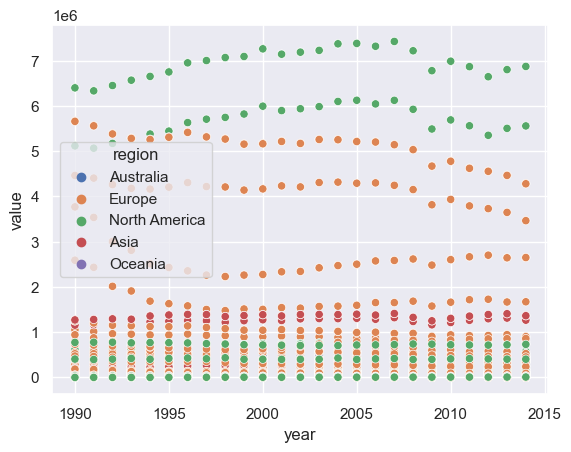

In [6]:
sns.scatterplot(x="year", y="value", hue="region", data=df)

In [7]:
df.country.unique()

array(['Australia', 'Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Canada',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'European Union', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Monaco',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Russian Federation', 'Slovakia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom',
       'United States of America'], dtype=object)

In [245]:
df.head()


,country,year,value,category,region,directions,capitals,official_language,target
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...,Australia,South,Canberra,English,0
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...,Australia,South,Canberra,English,0
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...,Australia,South,Canberra,English,0
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...,Australia,South,Canberra,English,0
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...,Australia,South,Canberra,English,0


In [9]:
df.drop(["region_encoded", "directions_encoded", "capitals_encoded", "official_language_encoded", "category_encoded", "country_encoded", "Unnamed: 0"], axis=1, inplace=True)

# Network of countries to region 

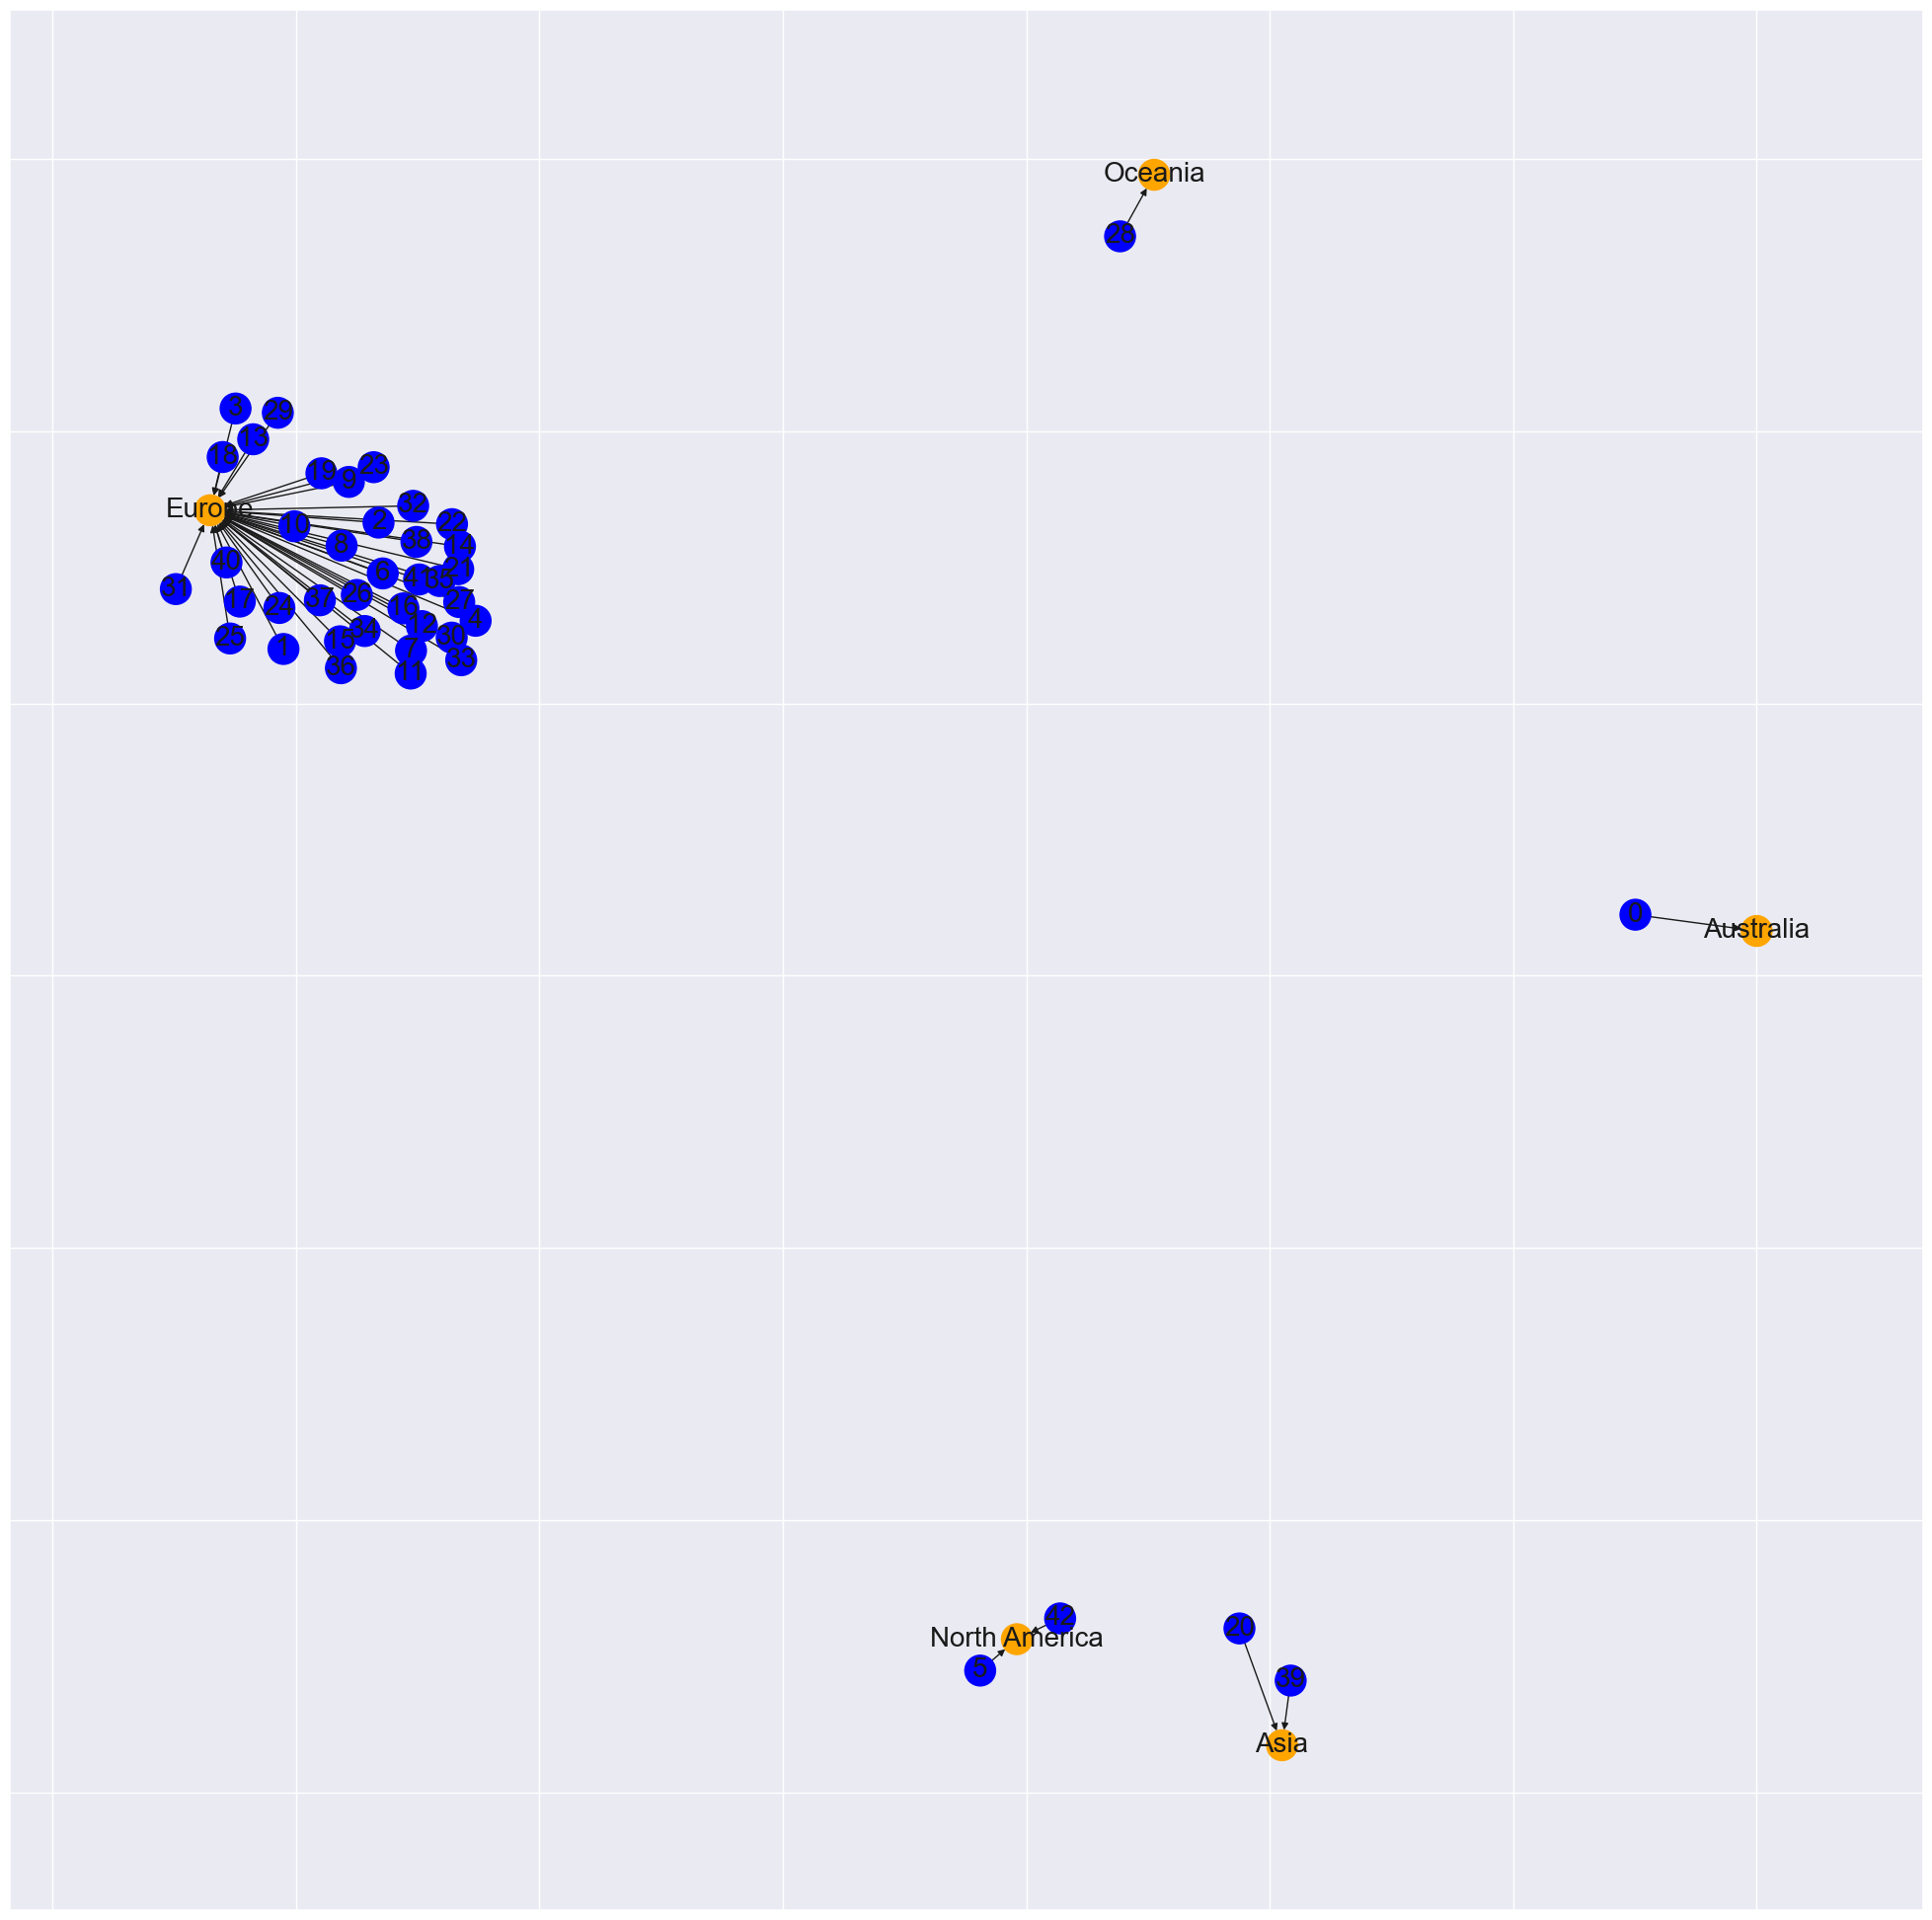

In [36]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
# Create a directed graph
G = nx.DiGraph()

# Define edges from the DataFrame
edges = [(df.iloc[i].country, df.iloc[i].region) for i in range(len(df))]
G.add_edges_from(edges, length=100)

# Initialize a dictionary to store node colors
node_colors = {}

# Set orange color for nodes representing regions
regions = set(df['region'])  # Assuming 'region' is a column in your DataFrame
for region in regions:
    node_colors[region] = 'orange'

# Set node colors based on the 'color' attribute
nx.set_node_attributes(G, node_colors, 'color')

# Calculate pagerank
ppr1 = nx.pagerank(G)

# Plot the graph with node colors
plt.figure(figsize=(25, 25))
pos = nx.spring_layout(G, seed=42)  # You can choose a layout algorithm that suits your graph
node_colors = [node_colors.get(node, 'blue') for node in G.nodes()]  # Default to blue for non-region nodes
nx.draw_networkx(G, pos, with_labels=True, node_size=500, node_color=node_colors, font_size=20)
plt.show()


In [11]:
node_colors

['orange',
 'blue',
 'orange',
 'blue',
 'blue',
 'blue',
 'blue',
 'orange',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'orange',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'orange',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue']

In [12]:
print (len(df.official_language.unique()))
print (len(df.region.unique()))

38
5


## Plotting language to region 

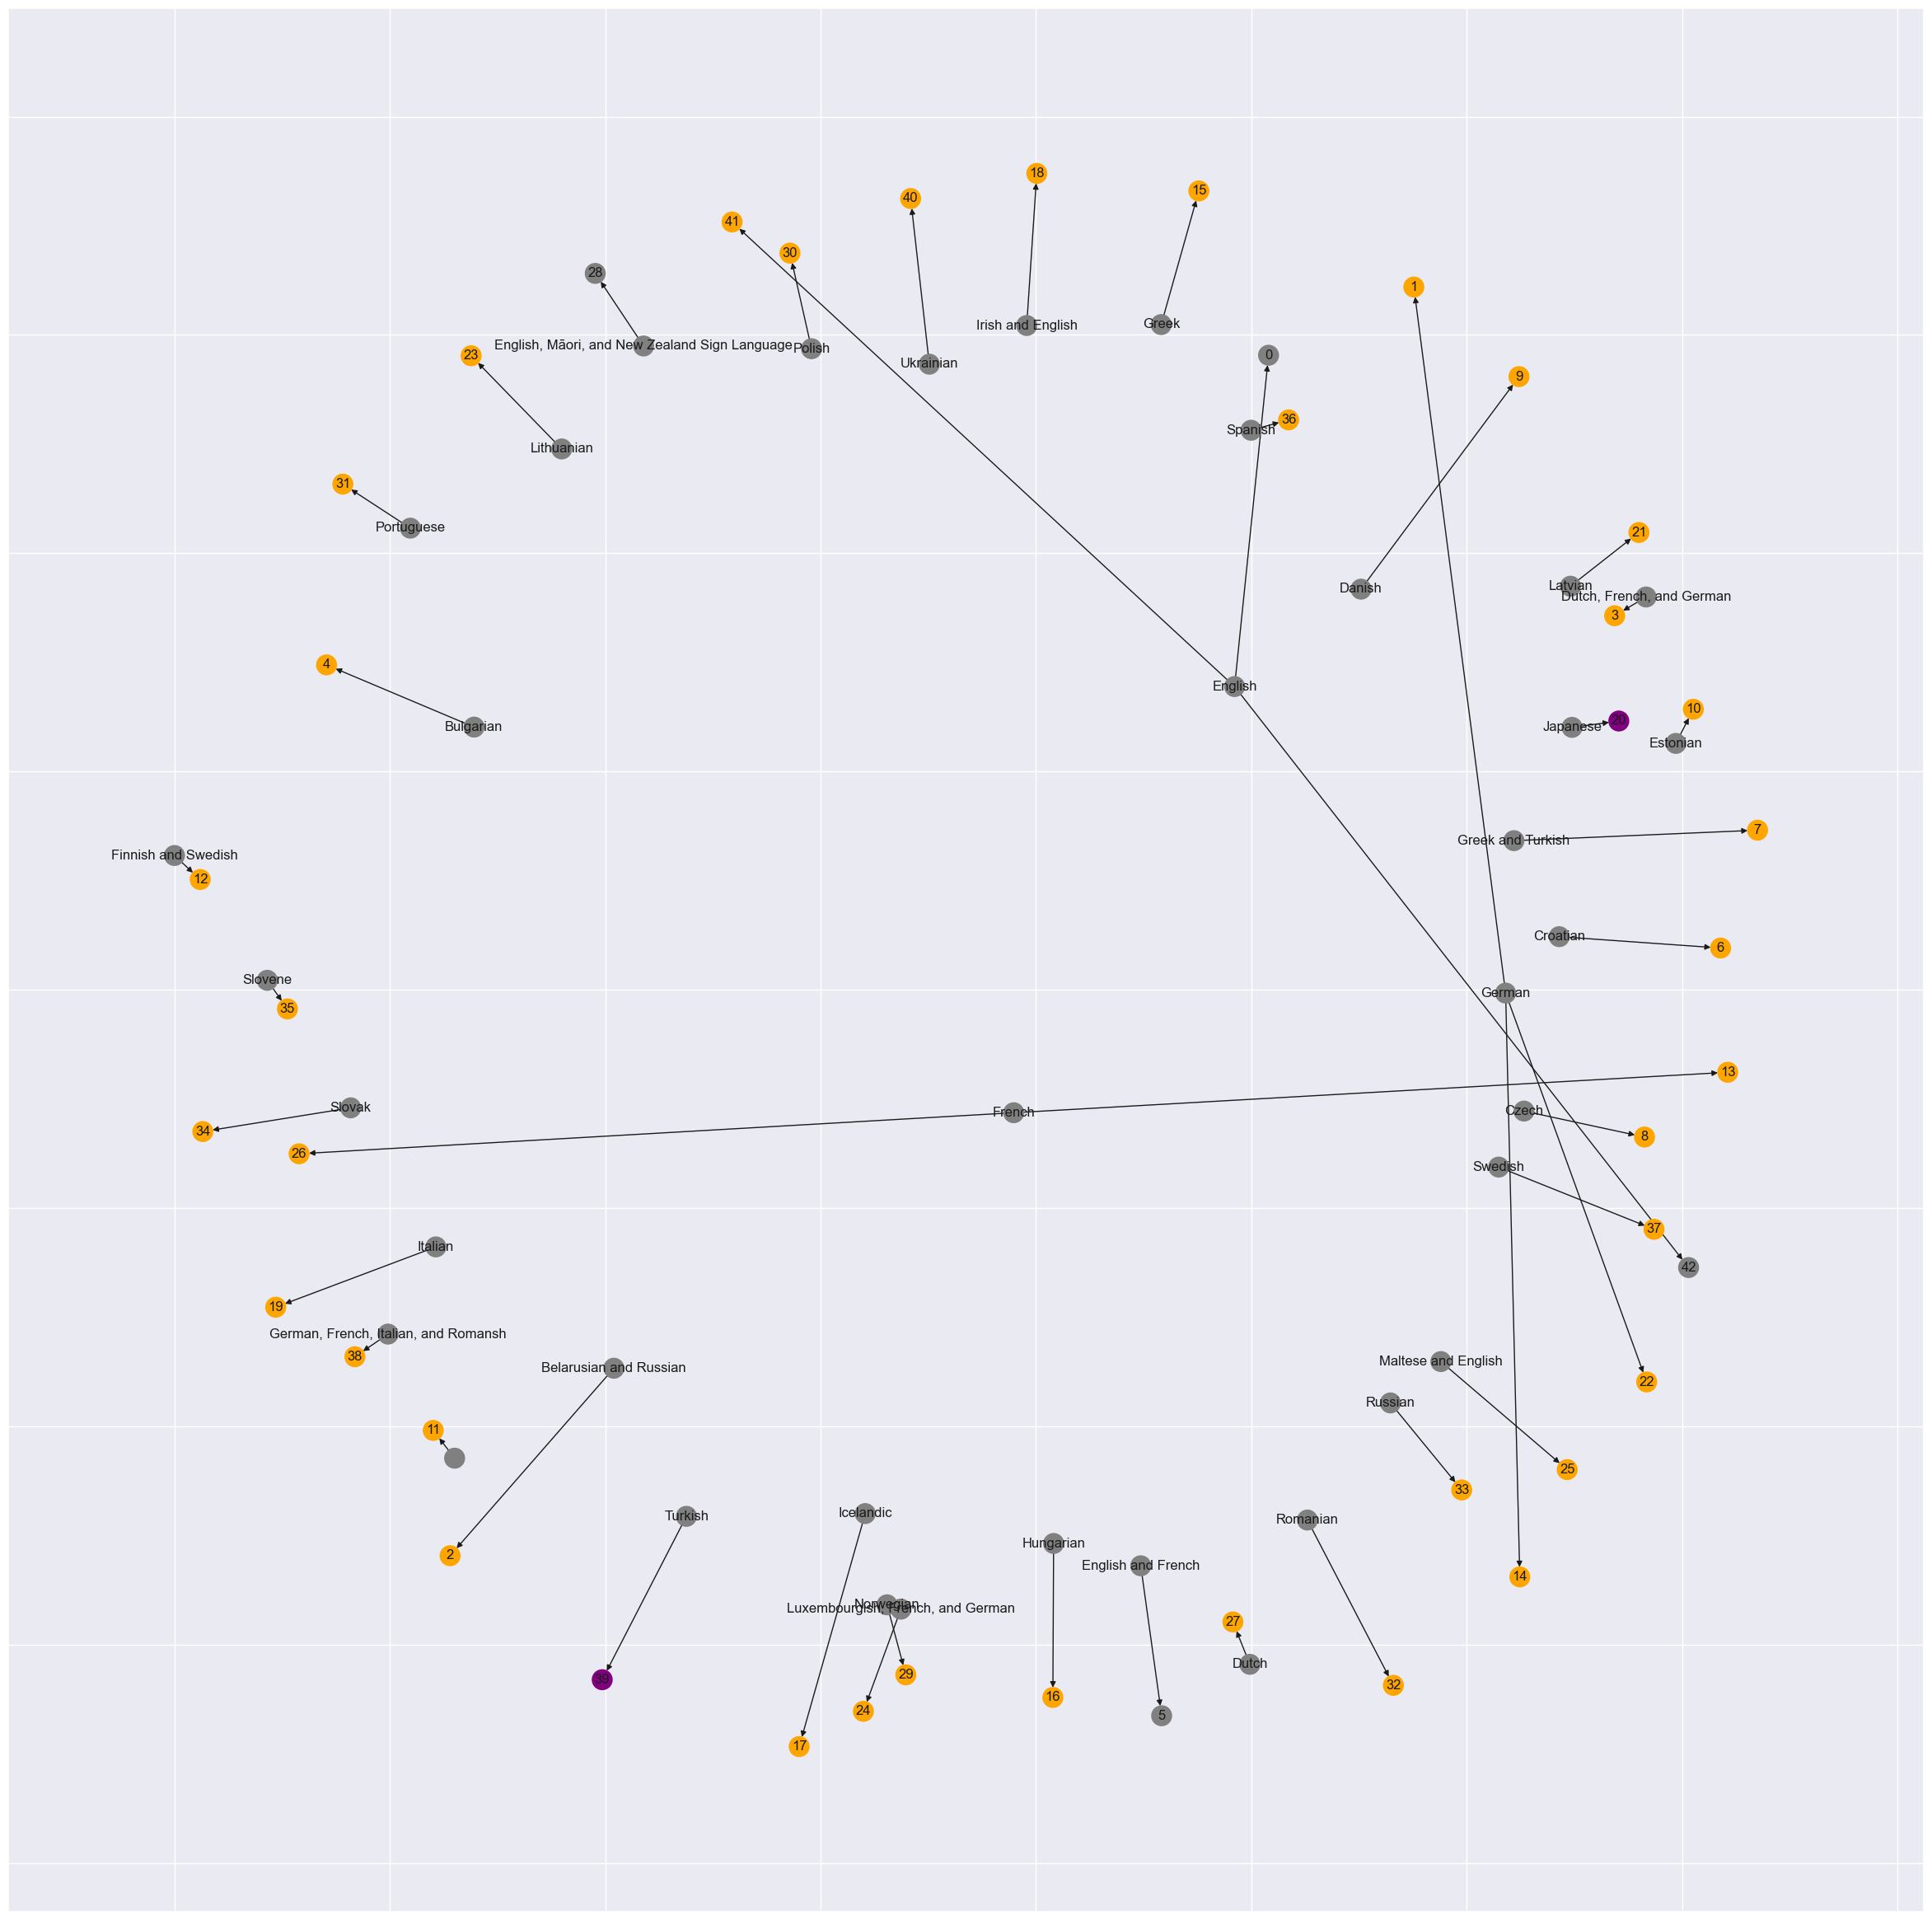

In [35]:
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline
# Create a directed graph
z = nx.DiGraph()

# Define edges from the DataFrame
edges2 = [(df.iloc[i].official_language, df.iloc[i].country) for i in range(len(df))]
z.add_edges_from(edges2)

# Define a color mapping for regions
region_colors = {'Europe': 'orange', 'Asia': 'purple', 'Africa': 'yellow'}  # Add more regions as needed

# Create a dictionary to store node colors based on regions
node_colors = {}

# Assign colors based on the 'region' column
for i in range(len(df)):
    country = df.iloc[i].country
    region = df.iloc[i].region
    
    # Node colors based on region
    node_colors[country] = region_colors.get(region, 'gray')  # Default to gray for unknown regions

# Plot the graph with node colors
plt.figure(figsize=(30, 30))
nx.draw_networkx(
    z, 
    with_labels=True,
    node_color=[node_colors.get(node, 'gray') for node in z.nodes()],
)

plt.show()


# Preprocessing

In [14]:
df.head()

,country,year,value,category,region,directions,capitals,official_language
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...,Australia,South,Canberra,English
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...,Australia,South,Canberra,English
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...,Australia,South,Canberra,English
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...,Australia,South,Canberra,English
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...,Australia,South,Canberra,English


<Axes: xlabel='count', ylabel='country'>

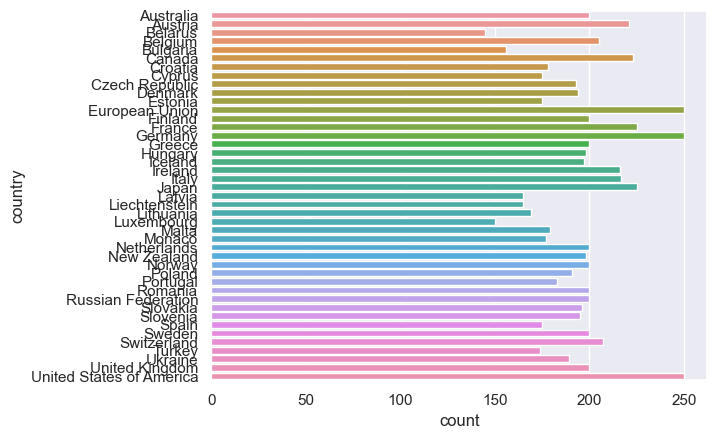

In [15]:
sns.countplot(y="country", data=df)

In [260]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from category_encoders import TargetEncoder
from category_encoders import WOEEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from category_encoders.cat_boost import CatBoostEncoder

# Create your data frame or load your data
# Assuming you have a DataFrame called "df"

woe = WOEEncoder()
te = TargetEncoder()
le = LabelEncoder()

# Encode the categorical variables
X = df.drop(["country", "capitals"], axis=1)
df["country"] = le.fit_transform(df["country"])
y = df.country.values.reshape(-1, 1)

# Use TargetEncoder to encode X
X = te.fit_transform(X, df["country"])

# Oversample the data
over_sampler = RandomOverSampler()
under_sampler = RandomUnderSampler()
X, y = under_sampler.fit_resample(X, y)


# New ModeL

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y)

clf = RandomForestClassifier(random_state=42, max_depth=7)
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)



## Improved accuracy





# Metrics

In [18]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score 
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score

In [19]:
## Training accuracy

train_pred = clf.predict(X_train)
print (f"Test accuracy: {accuracy_score(Y_test, pred) * 100} %")
print (f"cross val score: {cross_val_score(clf, X, y)}")
print (f"Training accuracy: {accuracy_score(Y_train, train_pred) * 100} %")
print (f1_score(Y_test, pred, average="macro"))
print (recall_score(Y_test, pred, average="macro"))
print (precision_score(Y_test, pred, average="macro"))

Test accuracy: 99.75942261427426 %
cross val score: [0.99438653 0.98075381 0.99599038 0.9935846  0.99518845]
Training accuracy: 99.67923015236568 %
0.9975920783432765
0.9975942261427425
0.997724431107777


In [20]:
import shap
def function(X_test):
    return clf.predict(X_test)
explainer = shap.Explainer(function, X_test)
shap_values = explainer(X_test)

Exact explainer: 1248it [01:05, 16.32it/s]                                      


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


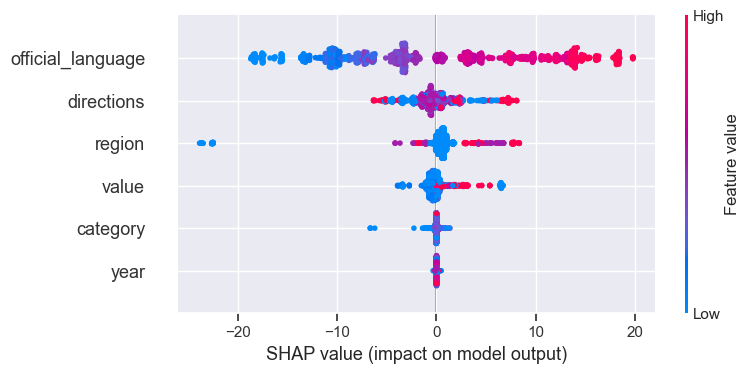

In [21]:
shap.summary_plot(shap_values)

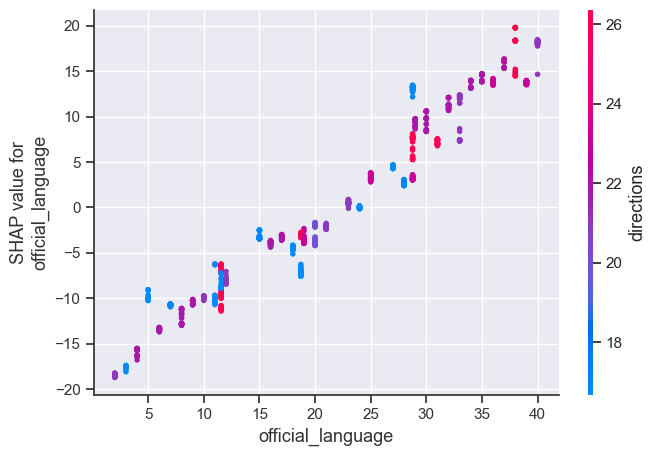

In [22]:
shap.dependence_plot("official_language", shap_values.values, X_test)

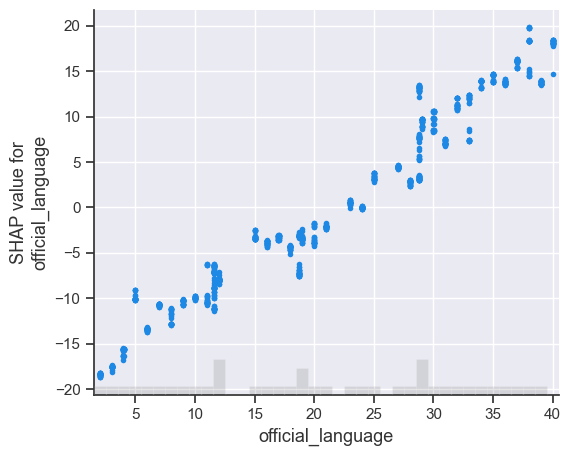

In [23]:
shap.plots.scatter(shap_values[:, "official_language"])

In [24]:
# Clustering 

clustering = shap.utils.hclust(
    X, y
)

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


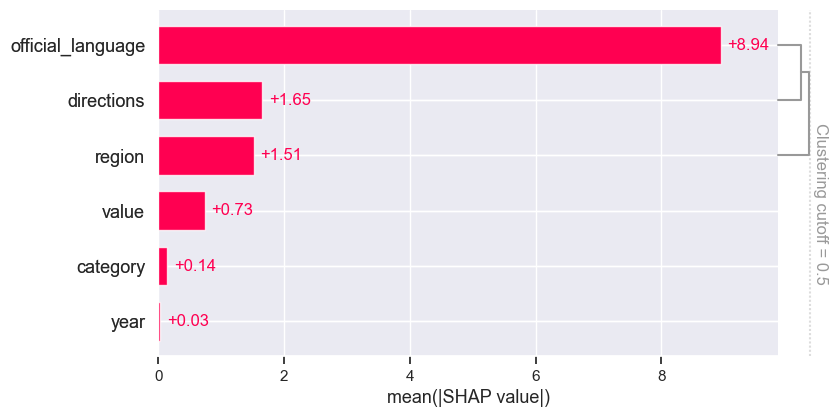

In [25]:
# Here, I found that official langauge, directions and region are redundant with each other 
shap.plots.bar(shap_values, clustering=clustering, clustering_cutoff=0.5)

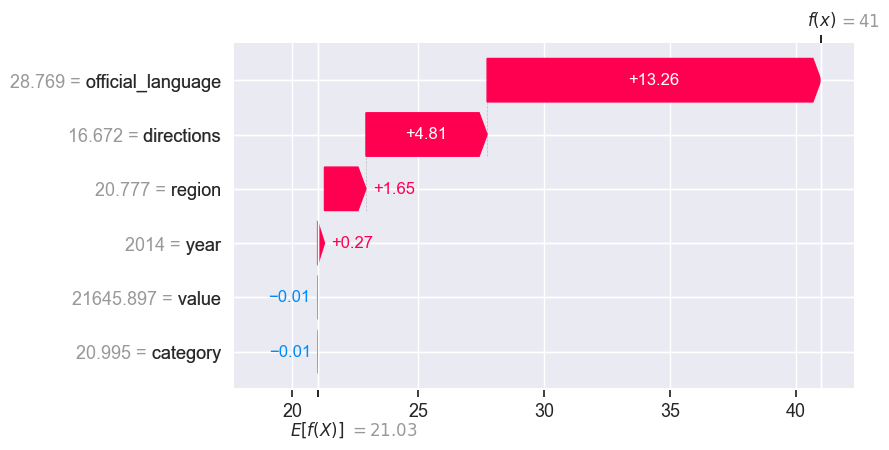

In [26]:
shap.plots.waterfall(shap_values[14])

In [27]:
pred

array([30, 11, 29, ..., 13,  3, 16])

In [28]:
shap.initjs() 
shap.force_plot(shap_values[14])

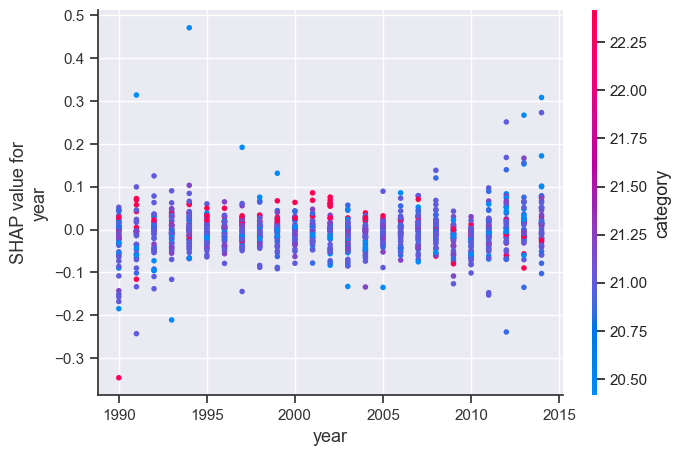

In [29]:
shap.dependence_plot("year", shap_values.values, X_test)

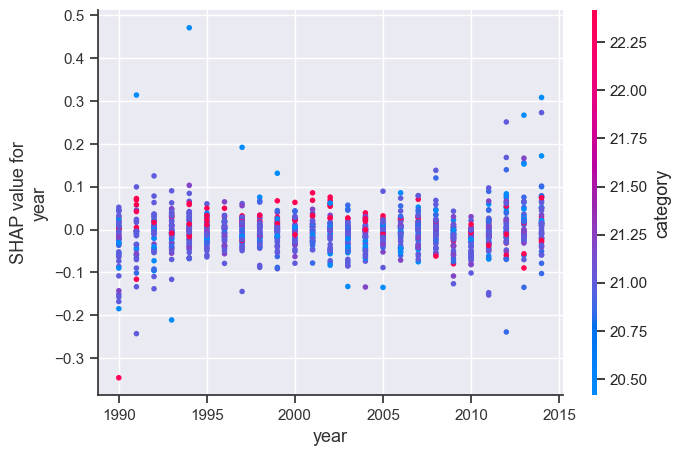

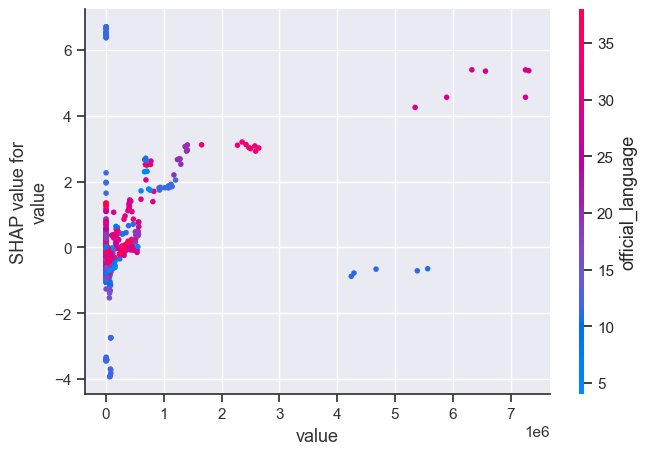

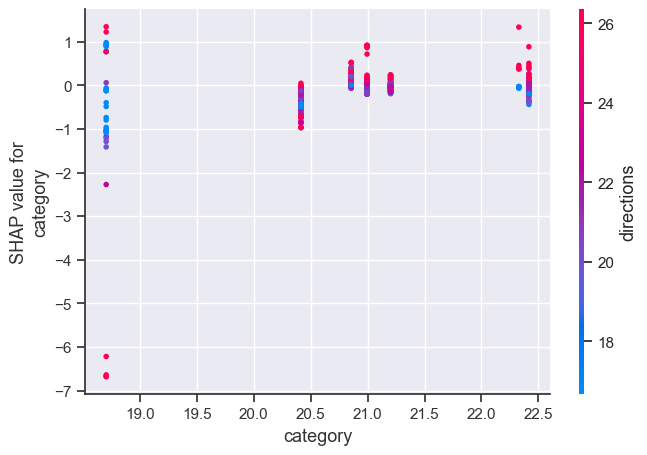

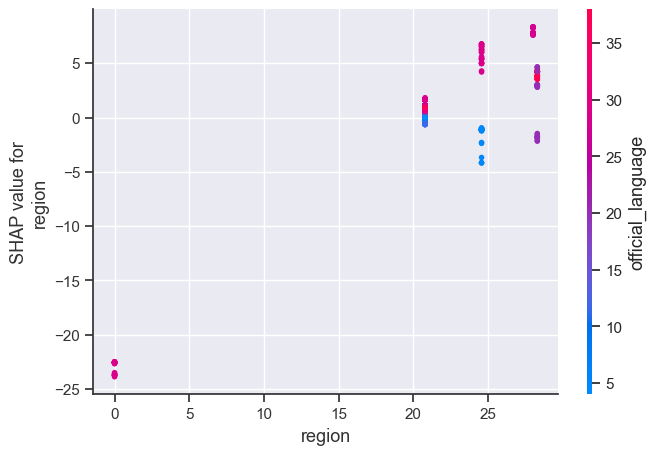

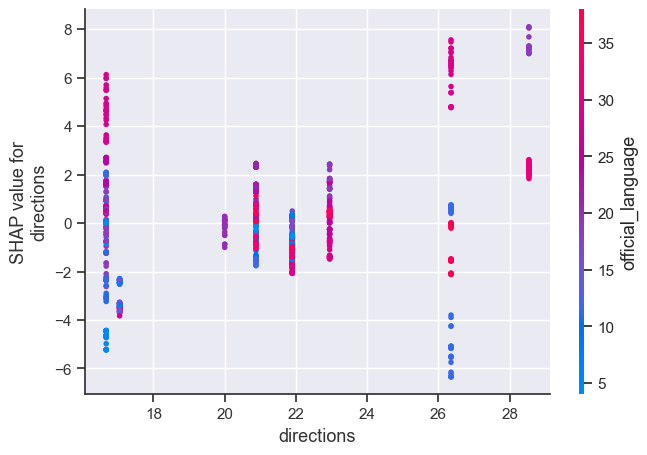

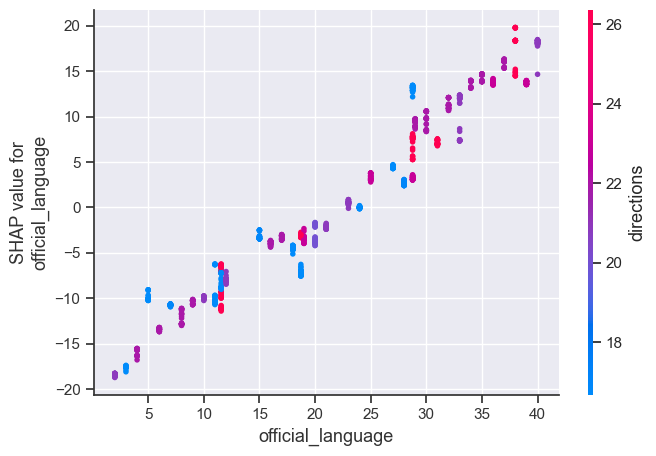

In [30]:
for i in X.columns:
    shap.dependence_plot(i, shap_values.values, X_test)

In [31]:
import requests

current = requests.get("http://api.weatherapi.com/v1/current.json?key=4a1f9e155ac6494e98a15506222712&q=London&aqi=yes") 

new_df = pd.read_json(current.text)

new_df.head()

,location,current
name,London,NaN
region,"City of London, Greater London",NaN
country,United Kingdom,NaN
lat,51.52,NaN
lon,-0.11,NaN


In [32]:
new_df

,location,current
name,London,NaN
region,"City of London, Greater London",NaN
country,United Kingdom,NaN
lat,51.52,NaN
lon,-0.11,NaN
tz_id,Europe/London,NaN
localtime_epoch,1694429460,NaN
localtime,2023-09-11 11:51,NaN
last_updated_epoch,NaN,1694429100
last_updated,NaN,2023-09-11 11:45


In [255]:
a = ["tthomas", "diana", "monica"]
b = [1, 2, 3]

a = [i for i in zip(a, b)]
a

[('tthomas', 1), ('diana', 2), ('monica', 3)]

In [271]:
array = []

for i in range(len(a)):
    if a[i][0] == "tthomas":
        print ("true")
        array.append(a[i][1])
for i in range(len(a)):
    if a[i][0] == "diana":
        print ("true")
        array.append(a[i][1])
        
print (array)

true
true
[1, 2]


In [263]:
len(a)

3

In [259]:
X

,year,value,category,region,directions,capitals,official_language
0,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...,Australia,South,Canberra,English
1,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...,Australia,South,Canberra,English
2,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...,Australia,South,Canberra,English
3,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...,Australia,South,Canberra,English
4,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...,Australia,South,Canberra,English
...,...,...,...,...,...,...,...
8401,1994,593.222570,unspecified_mix_of_hydrofluorocarbons_hfcs_and...,North America,West,"Washington, D.C.",English
8402,1993,586.939752,unspecified_mix_of_hydrofluorocarbons_hfcs_and...,North America,West,"Washington, D.C.",English
8403,1992,574.414624,unspecified_mix_of_hydrofluorocarbons_hfcs_and...,North America,West,"Washington, D.C.",English
8404,1991,566.900968,unspecified_mix_of_hydrofluorocarbons_hfcs_and...,North America,West,"Washington, D.C.",English


In [261]:
a = X


,year,value,category,region,directions,official_language
0,1993,1.138375e+05,20.995345,3.201593e-07,22.946032,28.769231
1,2014,3.931269e+05,20.995345,3.201593e-07,22.946032,28.769231
2,2012,2.948829e+02,22.416366,3.201593e-07,22.946032,28.769231
3,2005,3.855811e+05,20.995345,3.201593e-07,22.946032,28.769231
4,2003,3.578352e+03,21.202051,3.201593e-07,22.946032,28.769231
...,...,...,...,...,...,...
6230,1996,6.949838e+06,20.415174,2.455603e+01,26.354686,28.769231
6231,2005,4.960700e+02,18.705645,2.455603e+01,26.354686,28.769231
6232,2012,6.643011e+06,20.995345,2.455603e+01,26.354686,28.769231
6233,2001,8.245924e+03,22.416366,2.455603e+01,26.354686,28.769231
